<a href="https://colab.research.google.com/github/AngelFA04/gdp_happiness_analysis/blob/main/GDP_vs_Happiness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Felicidad vs PIB

## Actividades

1) Leer los datos de 'gdp-vs-happiness.csv' y compilar 5 países por
continente para África, América, Asia y Europa. No considere Oceanía, ya que tiene pocos países con suficiente
población.

2) Usando métodos de regresión lineal, encuentre un modelo que ajuste la "satisfacción de vida" vs el PIB (GDP
en inglés) per cápita para los países de cada continente (o sea, un modelo por continente). Use los datos de un mismo
año, como 2017.
Ayuda: la relación se vemás clara si considera el logaritmo base 10 del PIB per cápita.
Ayuda: puede servir escoger a los 5 países tal que sus PIBs no sean muy cercanos, esto es, para cubrir lo mejor posible el dominio.

3) Reporte los parámetros de los modelos encontrados y grafíquelos junto con los datos.

4) La medida de "satisfacción de vida" es una métrica controversial, que depende de la autopercepción de la gente y
de si esta miente o no en las encuestas. Supongamos que para cada país, la incertidumbre sigma asociada a esta medición
es un número aleatorio uniforme entre 0 y 2. Repita y reporte los ajustes considerando las incertidumbres en los datos.

5) Repita el paso 4, pero ahora aumentando considerablemente el número de países por continente. Si se puede, más de 20
o 30. Discuta brevemente los cambios en los valores obtenidos e incertidumbres de los ajustes.
'''

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Cargar documento
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vTZN4huK1iNdU7n5WlRKoPzucC5JP1yQAXNC0bHUdlU-qoEmwIR_X23HVvzqTz_9LD98qqivjRLQqzP/pub?gid=1694844705&single=true&output=csv"
df = pd.read_csv(url)

# Cambiar nombre de columna
df.rename(columns={"Total population (Gapminder, HYDE & UN)": "total_population"}, inplace=True)

# Realizar limpieza de datos nulos
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"], inplace=True)

In [ ]:
# Ver y guardar la lista con los contintentes
continentes = df["Continent"].unique()
print(continentes)

['Asia' 'Europe' 'South America' 'Oceania' 'Africa' 'North America']


In [ ]:
# Obtener datos de cada pais
paises_asia = df.query("Continent == 'Asia'")
paises_europe = df.query("Continent == 'Europe'")
paises_africa = df.query("Continent == 'Africa'")
paises_n_america = df.query("Continent == 'North America'")
paises_s_america = df.query("Continent == 'South America'")
paises_oceania = df.query("Continent == 'Oceania'")

paises_por_continentes = [paises_asia,
                          paises_europe,
                          paises_africa,
                          paises_n_america,
                          paises_s_america]

In [ ]:
# Ver una muestra de los paises de Asía, esto puede repetirse para cada país
print(paises_asia.head())

        Entity  ... GDP per capita, PPP (constant 2011 international $)
0  Afghanistan  ...                                        1809.016488 
3      Armenia  ...                                        8195.933650 
7   Azerbaijan  ...                                       16698.863650 
8      Bahrain  ...                                       43926.474040 
9   Bangladesh  ...                                        3132.567540 

[5 rows x 7 columns]


Usar metodo de sample de pandas para extraer la muestra de 5 países.

In [ ]:
paises_africa.sample(5)

,Entity,Code,Year,total_population,Continent,Life satisfaction in Cantril Ladder (World Happiness Report 2019),"GDP per capita, PPP (constant 2011 international $)"
29,Cote d'Ivoire,CIV,2015,23226000.0,Africa,4.445039,3241.612056
37,Egypt,EGY,2015,92443000.0,Africa,4.762538,10095.610170
107,Senegal,SEN,2015,14578000.0,Africa,4.617001,2293.853539
70,Libya,LBY,2015,6418000.0,Africa,5.615405,14847.197050
49,Guinea,GIN,2015,11432000.0,Africa,3.504694,1758.315595


In [ ]:
# Minimo de población por países
print(min(paises_africa["total_population"]))
print(min(paises_asia["total_population"]))
print(min(paises_europe["total_population"]))
print(min(paises_s_america["total_population"]))
print(min(paises_n_america["total_population"]))
print(min(paises_oceania["total_population"]))

1948000.0
728000.0
330000.0
3412000.0
3968000.0
4615000.0


In [ ]:
def obtener_muestras(n, paises_por_continentes):
    """
    n: cantidad de paises para la muestra
    paises_por_continentes: lista de paises cada uno de un continente
    """
    # Diccionario para guardar los datos 
    # muestra_paises
    muestras_por_continente = dict()
    # Tomar muestra de 5 países por continente
    for data_continente in paises_por_continentes:
        nombre_continente = data_continente.Continent.iloc[0]
        # Filtrar por cantidad de población y 
        # tomar muestra de 'n' países
        # Seleccionar datos de un año para cada continente
        muestras_por_continente[nombre_continente] = data_continente.query("total_population > 4615000 and Year == 2015").sample(n) # sample de 'n' elementos aleatorios
        # muestras_por_continente[nombre_continente] = data_continente.query("total_population > 4615000 and Year == 2015").iloc[:n] # primeros 'n' elementos
    
    return muestras_por_continente

In [ ]:
muestras_por_continente = obtener_muestras(5, (paises_por_continentes))

In [ ]:
def generar_modelos(datos):
    """
    datos: diccionario de data frames con muestras de paises por contiente
    """
    modelos = dict()
    for continent, data in datos.items():
        ##Genera los coeficientes para un polinomio de grado 1
        x = data["Life satisfaction in Cantril Ladder (World Happiness Report 2019)"]
        y = data["GDP per capita, PPP (constant 2011 international $)"]
        coeficientes = np.polyfit(x,y,1)
        print(f'Continente: {continent}')
        print(f'x: {list(x)}')
        print(f'y: {list(y)}')
        modelos[continent] = coeficientes
    return modelos

In [ ]:
modelos = generar_modelos(muestras_por_continente)

Continente: Asia
x: [5.04279995, 5.514465332, 5.124210835, 4.749955654, 6.201762676]
y: [10367.701990000001, 23388.4813, 2640.58952, 16500.90051, 15252.22825]
Continente: Europe
x: [6.357625007999999, 5.718907832999999, 6.608017445, 7.07644701, 5.34438324]
y: [37766.374110000004, 17229.55519, 30605.42052, 44304.96776, 25034.45073]
Continente: Africa
x: [3.483108997, 3.70319128, 3.660597324, 4.908617973, 3.592514038]
y: [1731.043423, 1912.2802609999999, 2490.957101, 1314.273728, 1377.1682130000002]
Continente: North America
x: [6.8540043829999995, 6.464986801, 7.412772655, 5.924112797, 6.236287117000001]
y: [14738.607619999999, 7292.719104000001, 43149.47584, 4956.921297999999, 16938.60541]
Continente: South America
x: [5.559724331, 5.964075089, 6.532749653, 6.387571812000001, 6.69713068]
y: [8639.28685, 10749.12887, 22516.60786, 12985.38313, 19116.907909999998]


In [ ]:
modelos

{'Africa': array([-380.48633646, 3237.47672618]),
 'Asia': array([ 3782.17528503, -6516.30164578]),
 'Europe': array([ 12649.4591075 , -47705.09416068]),
 'North America': array([  22702.0191298 , -131928.44029384]),
 'South America': array([ 10850.35317152, -52777.25261267])}

In [ ]:
# Segun la formula y = mX + b. El primer valor del array es 'm' y el segundo 'b'

In [ ]:
def graficar_modelos(modelos, muestras):
    """
    modelos: diccionario con los coeficientes de los modelos lineales
    muestras: diccionario con muestras de paises por continente
    """
    # Graficar puntos
    for continent, data in muestras.items():
        # Datos de paises para graficar
        indice_felicidad = data["Life satisfaction in Cantril Ladder (World Happiness Report 2019)"] # x
        pib = data["GDP per capita, PPP (constant 2011 international $)"] # y
        plt.figure(figsize=(12,7))
        min_indice_felicidad = min(indice_felicidad)
        max_indice_felicidad = max(indice_felicidad)
        
        # Graficar puntos de paises
        plt.scatter(indice_felicidad, pib)

        # Graficar modelos
        coeficientes =  modelos[continent]
        funcion_grafica = np.poly1d(coeficientes)
        # Array para las X
        xp = np.linspace(min_indice_felicidad-0.2, max_indice_felicidad+0.2, 100) # Modificar minimo y maximo
        #Función del modelo
        plt.plot(xp, funcion_grafica(xp), color='green')

        #Ejes 'x' y 'y'
        #plt.axvline(x=0, color='gray')
        #plt.axhline(y=0, color='gray')
        
        # Referencias
        x_model = "{:.2f}".format(coeficientes[0])
        b_model = "{:.2f}".format(coeficientes[1])
        plt.title(f'Felicidad vs PIB de {continent}. Modelo y = {x_model}X + {b_model}')
        plt.xlabel("Indice de Felicidad")
        plt.ylabel("PIB")
        plt.show()



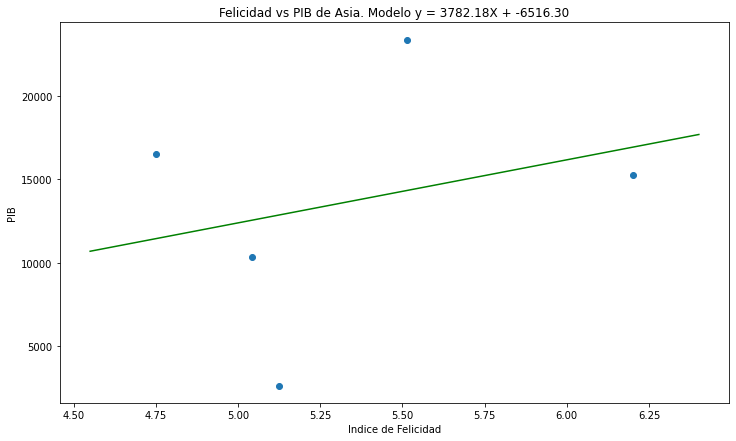

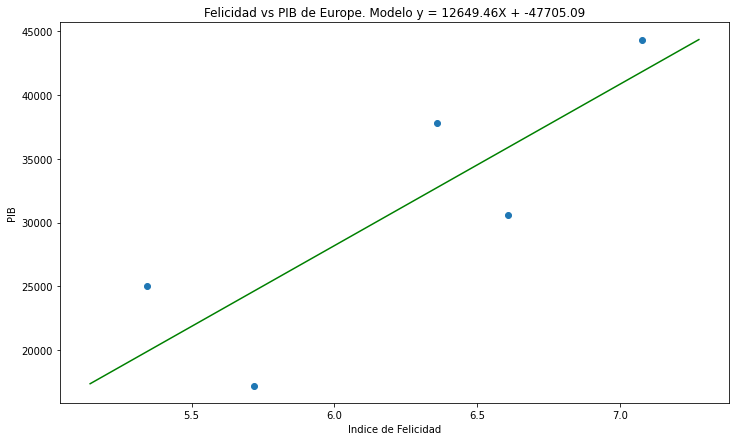

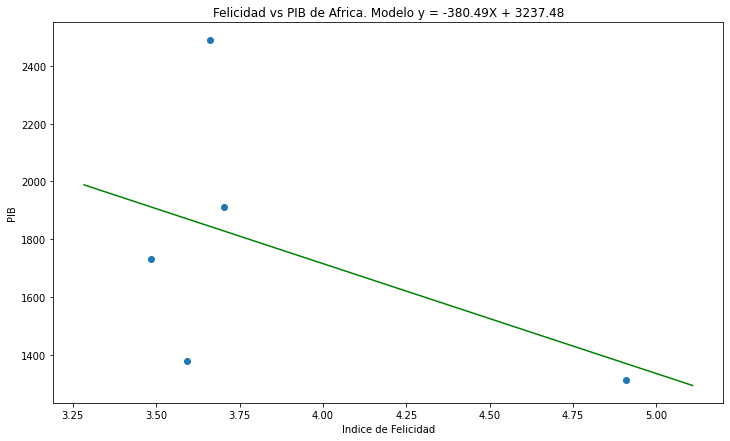

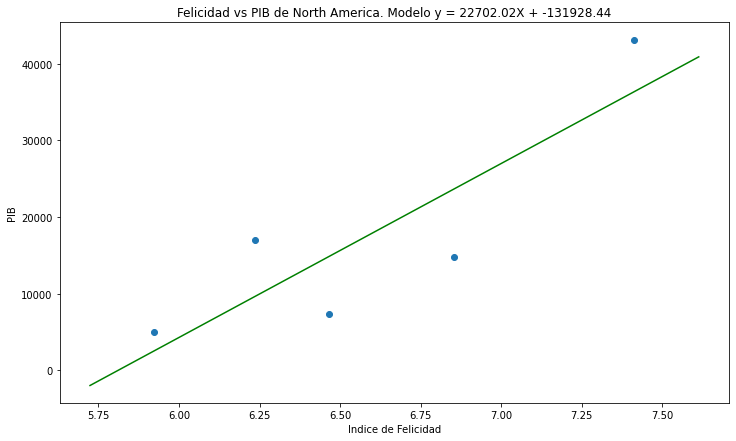

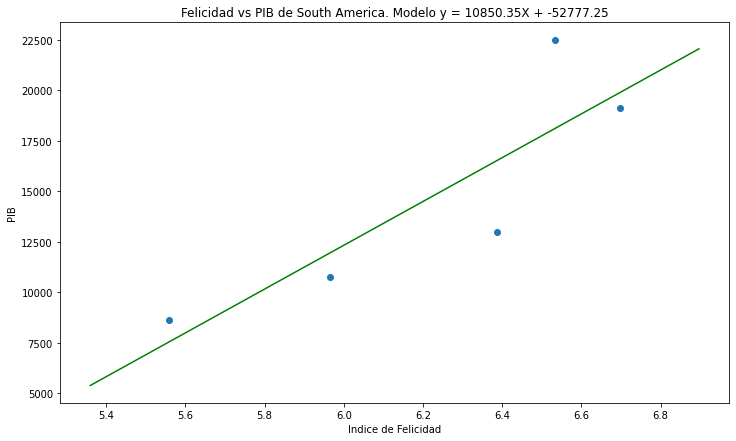

In [ ]:
graficar_modelos(modelos, muestras_por_continente)

In [ ]:
muestras_por_continente

{'Africa':            Entity  ... GDP per capita, PPP (constant 2011 international $)
 105        Rwanda  ...                                        1731.043423 
 137      Zimbabwe  ...                                        1912.280261 
 121      Tanzania  ...                                        2490.957101 
 109  Sierra Leone  ...                                        1314.273728 
 73     Madagascar  ...                                        1377.168213 
 
 [5 rows x 7 columns],
 'Asia':          Entity  ... GDP per capita, PPP (constant 2011 international $)
 55    Indonesia  ...                                        10367.70199 
 125      Turkey  ...                                        23388.48130 
 120  Tajikistan  ...                                         2640.58952 
 56         Iran  ...                                        16500.90051 
 122    Thailand  ...                                        15252.22825 
 
 [5 rows x 7 columns],
 'Europe':      Entity  ... GDP 